# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context
Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings. In this homework, you'll implement logistic regression on the Heart Disease Dataset—a real-world UCI repository collection of 303 patient records with 14 features and a binary target (1 for disease presence, 0 for absence). You'll train models, visualize boundaries, apply regularization, and explore deployment via Amazon SageMaker to mimic a production pipeline.

In [4]:
%pip install numpy matplotlib pandas

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 3.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.9 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.8 MB/s  0:00:02

   ---------------------------------------- 0/2 [tzdata]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
  

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Load and Prepare the Dataset

In [15]:
dfmeta = pd.read_csv("Heart_Disease_Prediction.csv")
dfmeta.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [16]:
dfmeta["Heart Disease"] = dfmeta["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})
dfmeta.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [23]:
dfmeta.shape

(270, 14)

In [19]:
dfmeta.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [21]:
dfmeta.info()


<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

In [22]:
dfmeta.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

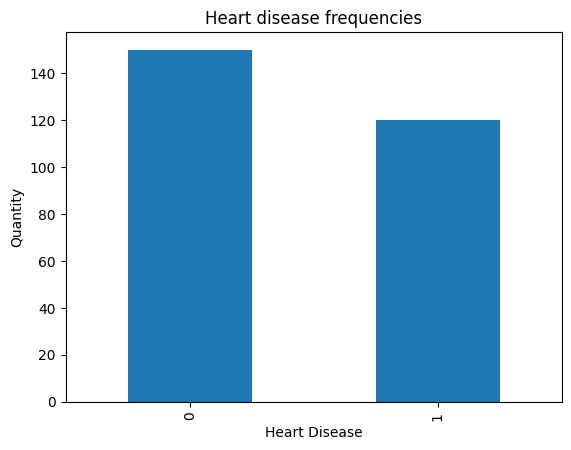

In [27]:
dfmeta["Heart Disease"].value_counts().plot(kind="bar")
plt.title("Heart disease frequencies")
plt.ylabel("Quantity")
plt.xlabel("Heart Disease")
plt.show()

